# Crime data in Chicago (January 1, 2010 to December 30, 2019)
Select a data set
Present a hypothesis regarding one item in the data set
Test said hypothesis
Present your results

In [4]:
import pandas as pd

# Select a data set
crime_data = pd.read_csv('datasets/Chicago_2019_2020.csv')  # treatment group
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [5]:
# Interrupted time series

In [6]:
import datetime

cols_to_remove = list(crime_data)

# Separating the date column into month, day, year, and time columns
Months = []
Days   = []
Years  = []
Hours  = []
MDY    = []

for row in crime_data['Date']:
    d = datetime.datetime.strptime(row, '%m/%d/%Y %I:%M:%S %p')
    Months.append(d.month)
    Days.append(d.day)
    Years.append(d.year)
    Hours.append(d.hour)
    MDY.append(datetime.datetime.strptime(row[:10], '%m/%d/%Y'))
    
crime_data['Month'] = Months
crime_data['Day'] = Days
crime_data['Year_'] = Years
crime_data['Hour'] = Hours
crime_data['MDY'] = MDY


In [7]:
# 1-hot encoding for: Arrest, Location Description, Domestic, District, Primary Type
discrete_variables = "Arrest, Location Description, Domestic, District, Primary Type".split(", ")
print(discrete_variables)
for variable in discrete_variables:
    for dtype in crime_data[variable].dropna().unique():
        if (dtype != "nan"):
            crime_data[variable+"_"+str(dtype)]  = 1*(crime_data[variable] == dtype)

crime_data = crime_data.drop(columns=cols_to_remove)


['Arrest', 'Location Description', 'Domestic', 'District', 'Primary Type']


In [8]:
# pre-intervention and post-intervention
pre_intervention_data = (crime_data[crime_data['Year_']==2019]).copy(deep=True)
intervention_data = (crime_data[crime_data['Year_']==2020]).copy(deep=True)
intervention_data = (intervention_data[intervention_data['Month']<5])

post_intervention_data = (crime_data[crime_data['Year_']==2020]).copy(deep=True)
post_intervention_data = (post_intervention_data[post_intervention_data['Month']>=5])
# post_intervention_data = (crime_data[crime_data['Year_']==2020 and (not(crime_data[crime_data['Month'] in [1,2,3,4]]))]).copy(deep=True)

print(intervention_data.dtypes)

Month                                                              int64
Day                                                                int64
Year_                                                              int64
Hour                                                               int64
MDY                                                       datetime64[ns]
Arrest_False                                                       int64
Arrest_True                                                        int64
Location Description_APARTMENT                                     int64
Location Description_RESIDENCE                                     int64
Location Description_OTHER (SPECIFY)                               int64
Location Description_ALLEY                                         int64
Location Description_DAY CARE CENTER                               int64
Location Description_OTHER                                         int64
Location Description_CHURCH/SYNAGOGUE/PLACE OF WORS

In [9]:
# calculate rate of crime reports to arrest
pre_intervention_d_rates = {} 
intervention_d_rates = {}
post_intervention_d_rates = {}

for row in pre_intervention_data['MDY'].unique():
    pre_intervention_d_rates[row] = pre_intervention_data[pre_intervention_data['MDY']==row]['Arrest_True']

for row in intervention_data['MDY'].unique():
    intervention_d_rates[row] = intervention_data[intervention_data['MDY']==row]['Arrest_True']    

for row in post_intervention_data['MDY'].unique():
    post_intervention_d_rates[row] = post_intervention_data[post_intervention_data['MDY']==row]['Arrest_True']
#     if not(day in post_intervention_d_rates):
#         post_intervention_d_rates[day] = [post_intervention_data['Arrest_True'][k]]
#     else:
#         post_intervention_d_rates[day].append(post_intervention_data['Arrest_True'][k])

#print(post_intervention_data['Day'][0])

In [10]:
pre_intervention_rates = [] 
intervention_rates = []
post_intervention_rates = []

for i in pre_intervention_d_rates.keys():
    arrests = sum(pre_intervention_d_rates[i])
    reports = len(pre_intervention_d_rates[i])
    pre_intervention_rates.append(float(arrests)/float(reports))
    
for i in intervention_d_rates.keys():
    arrests = sum(intervention_d_rates[i])
    reports = len(intervention_d_rates[i])
    intervention_rates.append(float(arrests)/float(reports))
    
for i in post_intervention_d_rates.keys():
    arrests = sum(post_intervention_d_rates[i])
    reports = len(post_intervention_d_rates[i])
    post_intervention_rates.append(float(arrests)/float(reports))



In [11]:
pre_intervention_data.describe()

,Month,Day,Year_,Hour,Arrest_False,Arrest_True,Location Description_APARTMENT,Location Description_RESIDENCE,Location Description_OTHER (SPECIFY),Location Description_ALLEY,...,Primary Type_KIDNAPPING,Primary Type_HOMICIDE,Primary Type_LIQUOR LAW VIOLATION,Primary Type_OBSCENITY,Primary Type_ARSON,Primary Type_GAMBLING,Primary Type_PUBLIC INDECENCY,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_HUMAN TRAFFICKING,Primary Type_NON-CRIMINAL
count,133814.000000,133814.000000,133814.0,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.00000,133814.000000,...,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000,133814.000000
mean,9.370619,15.588840,2019.0,13.086456,0.791509,0.208491,0.129232,0.164086,0.00127,0.020603,...,0.000635,0.001891,0.000994,0.000209,0.001577,0.000643,0.000060,0.000037,0.000037,0.000015
std,1.713735,8.856968,0.0,6.592336,0.406231,0.406231,0.335457,0.370355,0.03562,0.142052,...,0.025195,0.043441,0.031511,0.014464,0.039678,0.025343,0.007732,0.006113,0.006113,0.003866
min,7.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,2019.0,9.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,16.000000,2019.0,14.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,23.000000,2019.0,18.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,31.000000,2019.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
intervention_data.describe()

,Month,Day,Year_,Hour,Arrest_False,Arrest_True,Location Description_APARTMENT,Location Description_RESIDENCE,Location Description_OTHER (SPECIFY),Location Description_ALLEY,...,Primary Type_KIDNAPPING,Primary Type_HOMICIDE,Primary Type_LIQUOR LAW VIOLATION,Primary Type_OBSCENITY,Primary Type_ARSON,Primary Type_GAMBLING,Primary Type_PUBLIC INDECENCY,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_HUMAN TRAFFICKING,Primary Type_NON-CRIMINAL
count,67044.000000,67044.000000,67044.0,67044.000000,67044.000000,67044.000000,67044.000000,67044.000000,67044.000000,67044.000000,...,67044.000000,67044.000000,67044.000000,67044.000000,67044.00000,67044.000000,67044.000000,67044.000000,67044.000000,67044.0
mean,2.333184,15.141131,2020.0,12.925467,0.804830,0.195170,0.168770,0.173528,0.015199,0.018928,...,0.000537,0.002431,0.000716,0.000224,0.00173,0.000089,0.000045,0.000075,0.000030,0.0
std,1.091077,8.834571,0.0,6.485308,0.396335,0.396335,0.374551,0.378706,0.122345,0.136271,...,0.023166,0.049248,0.026748,0.014956,0.04156,0.009460,0.006689,0.008636,0.005462,0.0
min,1.000000,1.000000,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,7.000000,2020.0,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2.000000,15.000000,2020.0,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
75%,3.000000,23.000000,2020.0,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
max,4.000000,31.000000,2020.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


In [13]:
post_intervention_data.describe()

,Month,Day,Year_,Hour,Arrest_False,Arrest_True,Location Description_APARTMENT,Location Description_RESIDENCE,Location Description_OTHER (SPECIFY),Location Description_ALLEY,...,Primary Type_KIDNAPPING,Primary Type_HOMICIDE,Primary Type_LIQUOR LAW VIOLATION,Primary Type_OBSCENITY,Primary Type_ARSON,Primary Type_GAMBLING,Primary Type_PUBLIC INDECENCY,Primary Type_OTHER NARCOTIC VIOLATION,Primary Type_HUMAN TRAFFICKING,Primary Type_NON-CRIMINAL
count,109049.000000,109049.000000,109049.0,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,...,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000,109049.000000
mean,7.509422,16.113729,2020.0,12.897386,0.861191,0.138809,0.161973,0.173087,0.028739,0.025053,...,0.000651,0.004649,0.000779,0.000275,0.003466,0.000147,0.000046,0.000009,0.000018,0.000009
std,1.680915,9.020624,0.0,6.843960,0.345749,0.345749,0.368428,0.378324,0.167074,0.156287,...,0.025508,0.068027,0.027908,0.016584,0.058774,0.012112,0.006771,0.003028,0.004283,0.003028
min,5.000000,1.000000,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,2020.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,16.000000,2020.0,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,24.000000,2020.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,31.000000,2020.0,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


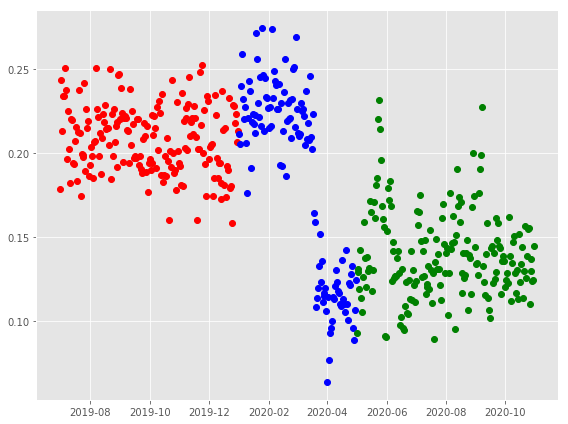

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

x1=pre_intervention_d_rates.keys()
y1=pre_intervention_rates
x2=intervention_d_rates.keys()
y2=intervention_rates
x3=post_intervention_d_rates.keys()
y3=post_intervention_rates


plt.plot_date(x1, y1, c="red")
plt.plot_date(x2, y2, c="blue")
plt.plot_date(x3, y3, c="green")
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
# plt.scatter(x1,y1, c="red")
# plt.plot(x1, regression_line)

plt.show()

In [15]:
import numpy as np

X = crime_data.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [18]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=5) #find 2 principal components
fit = pca.fit(X)
print(("Explained Variance: %s") % (fit.explained_variance_ratio_))

pc1, pc2, pc3, pc4, p5 = pca.components_

weights1 = list(zip(pc1, crime_data.columns))
weights1.sort()

print('Principal Component 1: \n (Negative)',weights1[:5], '\n\n (Positive)' ,weights1[-5:])

Explained Variance: [0.08477834 0.0814893  0.04205039 0.03919373 0.03364693]
('Principal Component 1: \n (Negative)', [(-0.4406790867937141, 'Domestic_False'), (-0.4115996147804455, 'Arrest_True'), (-0.19508192387628254, 'Location Description_STREET'), (-0.16041518689764908, 'Primary Type_NARCOTICS'), (-0.12238421952993349, 'Primary Type_THEFT')], '\n\n (Positive)', [(0.18587017277011636, 'Location Description_APARTMENT'), (0.2183571789377886, 'Location Description_RESIDENCE'), (0.2999764012474343, 'Primary Type_BATTERY'), (0.4115996147804455, 'Arrest_False'), (0.4406790867937141, 'Domestic_True')])


In [ ]:
# more examples from class below ...

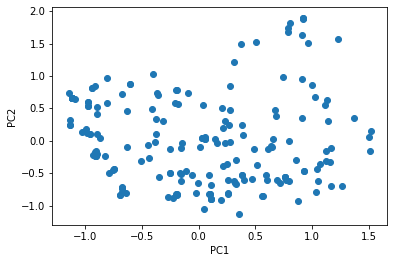

In [77]:
%matplotlib inline  

import matplotlib.pyplot as plt

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Let's try to interpret this figure a bit more. Let's see where all the "Baathist" Arab countries lie on this plot:

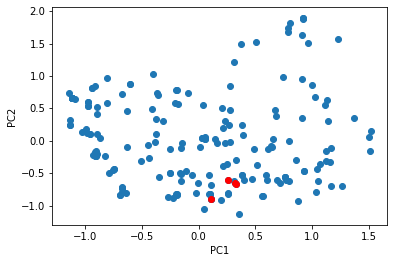

In [112]:
arab = ['Syria', 'Jordan', 'Kuwait', 'UAE']
arab_index = [list(flag.index.values).index(a) for a in arab]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[arab_index,0], Y[arab_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Or we can look at all of the countries in northern europe

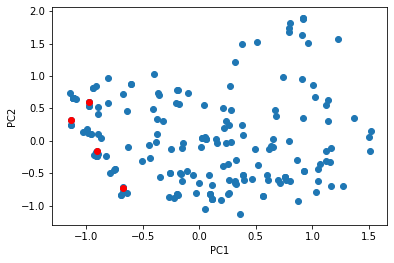

In [109]:
ne = ['Norway', 'Denmark', 'Finland', 'Iceland']
ne_index = [list(flag.index.values).index(a) for a in ne]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[ne_index,0], Y[ne_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering
When we were playing around with the data we manually used data clusters that we roughly knew about to validate our model. How do we do this automatically? Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In particular, we will focus on a simple form of clustering called "k-means". k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Again, the mathematical details are better left for a machine learning class but you can see how to use scikit-learn to do this:

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15) #break the data into 15 clusters
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [120]:
flag[kmeans.labels_ == 9]

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,animate,text,mainhue_green,mainhue_red,mainhue_blue,mainhue_gold,mainhue_white,mainhue_orange,mainhue_black,mainhue_brown
name,,,,,,,,,,,,,,,,,,,,,
American-Samoa,0.0,0.000000,0.571429,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Belize,0.0,0.142857,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
British-Virgin-Isles,0.0,0.000000,0.714286,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Cayman-Islands,0.0,0.000000,0.714286,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Falklands-Malvinas,0.0,0.000000,0.714286,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Fiji,0.0,0.000000,0.857143,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Guam,0.0,0.000000,0.857143,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Hong-Kong,0.0,0.000000,0.714286,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Montserrat,0.0,0.000000,0.857143,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
flag[kmeans.labels_ == 6]

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,animate,text,mainhue_green,mainhue_red,mainhue_blue,mainhue_gold,mainhue_white,mainhue_orange,mainhue_black,mainhue_brown
name,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.000000,0.285714,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.142857,0.285714,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.214286,0.285714,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Burkina,0.0,0.142857,0.285714,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
China,0.0,0.000000,0.142857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Congo,0.0,0.000000,0.285714,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghana,0.0,0.214286,0.428571,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Kampuchea,0.0,0.000000,0.142857,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Liechtenstein,0.0,0.142857,0.285714,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
